In [ ]:
Student Information

Name: 魏琦蓁

Student ID: 410979148

GitHub ID: chi-chen-wei

Kaggle name: cienna

Kaggle private scoreboard snapshot: late submission

In [1]:
import numpy as np
import pandas as pd
import os
import json
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.sparse import hstack
import re
import string
import nltk
import gensim
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression

In [4]:
def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

### Data Overview

In [5]:
data_id_df = pd.read_csv("/kaggle/input/dm-2024-isa-5810-lab-2-homework/data_identification.csv")
data_id_df.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


In [6]:
emotion_df = pd.read_csv("/kaggle/input/dm-2024-isa-5810-lab-2-homework/emotion.csv")
emotion_df.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


In [7]:
# Open and read the JSON file
with open('/kaggle/input/dm-2024-isa-5810-lab-2-homework/tweets_DM.json') as file:
    data = []
    for line in file:
        try:
            data.append(json.loads(line))
        except json.JSONDecodeError as e:
            print(f"Error decoding JSON on line: {line}")
            print(e)

In [8]:
tweets_df = pd.DataFrame(data)

if '_source' in tweets_df.columns:
    tweet_data = pd.json_normalize(tweets_df['_source'].apply(lambda x: x.get('tweet', {})))

tweet_data.to_csv('tweet_data.csv', index=False)

In [9]:
tweet_data_df = pd.DataFrame(tweet_data)
tweet_data_df.head()

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [10]:
print(len(emotion_df))
print(len(tweet_data_df))

1455563
1867535


In [11]:
merged_df = tweet_data_df.merge(emotion_df, on='tweet_id', how='left')
merged_df.head()

,hashtags,tweet_id,text,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",NaN
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",NaN


emotion
joy             516017
anticipation    248935
trust           205478
sadness         193437
disgust         139101
fear             63999
surprise         48729
anger            39867
Name: count, dtype: int64


<Axes: title={'center': 'Category distribution'}, xlabel='emotion'>

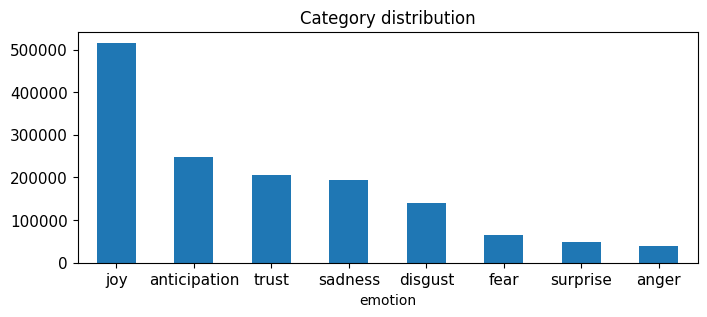

In [12]:
print(merged_df['emotion'].value_counts())
merged_df.emotion.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',      
                                    rot = 0, fontsize = 11, figsize = (8,3))

In [13]:
merged_df.isnull().apply(lambda x: check_missing_values(x)) # number of test datadf = merged_df.merge(data_id_df, on='tweet_id', how='left')

,hashtags,tweet_id,text,emotion
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,411972


In [14]:
df = merged_df.merge(data_id_df, on='tweet_id', how='left')
df.head()

,hashtags,tweet_id,text,emotion,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",NaN,test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",NaN,test


In [15]:
df.identification.value_counts()

identification
train    1455563
test      411972
Name: count, dtype: int64

In [16]:
train_df = df[df['identification'] == 'train']
test_df = df[df['identification'] == 'test']

train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

In [17]:
train_df.head()

,hashtags,tweet_id,text,emotion,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation,train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness,train
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear,train
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy,train
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation,train


In [18]:
test_df.head()

,hashtags,tweet_id,text,emotion,identification
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",NaN,test
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",NaN,test
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,NaN,test
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",NaN,test
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",NaN,test


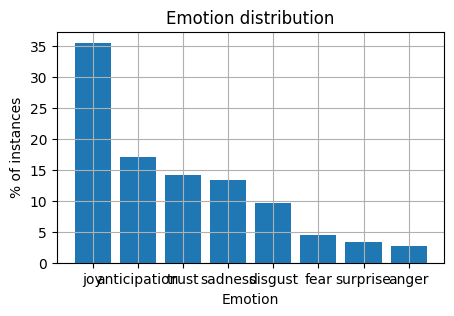

In [19]:
# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.emotion.value_counts()
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

^ imbalanced category distribution 

### Feature Engineering

#### Preprocessing

In [28]:
def combine_text_and_hashtags(row):
    hashtags = " ".join(row['hashtags']) if isinstance(row['hashtags'], list) else ""
    return f"{row['text']} {hashtags}"

train_df['text'] = train_df.apply(combine_text_and_hashtags, axis=1)
test_df['text'] = test_df.apply(combine_text_and_hashtags, axis=1)

/tmp/ipykernel_23/207938069.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['text'] = train_df.apply(combine_text_and_hashtags, axis=1)
/tmp/ipykernel_23/207938069.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['text'] = test_df.apply(combine_text_and_hashtags, axis=1)


In [29]:
def preprocess_text(text):
    texts = text.split()
    cleaned = []
    for word in texts:
        word = re.sub('[^a-zA-Z]', '', word.lower())
        word = word.lower()
        cleaned.append(word)

    return cleaned

train_df["cleaned_text"] = train_df["text"].apply(preprocess_text)
test_df["cleaned_text"] = test_df["text"].apply(preprocess_text)

/tmp/ipykernel_23/4292248413.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df["cleaned_text"] = train_df["text"].apply(preprocess_text)
/tmp/ipykernel_23/4292248413.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["cleaned_text"] = test_df["text"].apply(preprocess_text)


#### tfidf + logistic regression

In [ ]:
X = train_df['text']
y = train_df['emotion']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_val_tfidf = tfidf.transform(X_val)

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_val_tfidf)
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.5368293411836641

Classification Report:
              precision    recall  f1-score   support

       anger       0.59      0.22      0.32      7946
anticipation       0.60      0.51      0.56     49984
     disgust       0.49      0.36      0.41     27669
        fear       0.72      0.33      0.45     12846
         joy       0.52      0.81      0.63    102943
     sadness       0.51      0.45      0.48     38745
    surprise       0.64      0.21      0.31      9816
       trust       0.56      0.29      0.38     41164

    accuracy                           0.54    291113
   macro avg       0.58      0.40      0.44    291113
weighted avg       0.55      0.54      0.51    291113



In [76]:
test_texts = test_df['text']

test_tfidf = tfidf.transform(test_texts)

test_predictions = model.predict(test_tfidf)

output_df = pd.DataFrame({
    'id': test_df['tweet_id'],
    'emotion': test_predictions 
})

output_df.to_csv('submission.csv', index=False)

In [77]:
output_df.head()

,id,emotion
2,0x28b412,anticipation
4,0x2de201,anticipation
9,0x218443,joy
30,0x2939d5,joy
33,0x26289a,trust


#### Word2Vec

In [35]:
training_corpus = train_df['cleaned_text'].values

w2v =Word2Vec(sentences=training_corpus, vector_size=100, window=5, workers=4, epochs=10, min_count=5)

In [36]:
def tweet_vector(tweet):
    vectors = [w2v.wv[word] for word in tweet if word in w2v.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(w2v.vector_size)

train_df['w2v_embedding'] = train_df['cleaned_text'].apply(tweet_vector)
test_df['w2v_embedding'] = test_df['cleaned_text'].apply(tweet_vector)

/tmp/ipykernel_23/849111371.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['w2v_embedding'] = train_df['cleaned_text'].apply(tweet_vector)
/tmp/ipykernel_23/849111371.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['w2v_embedding'] = test_df['cleaned_text'].apply(tweet_vector)


#### w2v + logistic regression

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    train_df['w2v_embedding'], 
    train_df['emotion'], 
    test_size=0.2, 
    random_state=42
)

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    return le.transform(labels)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

model = LogisticRegression()
model.fit(list(X_train), y_train)

y_train_pred = model.predict(list(X_train))
y_test_pred = model.predict(list(X_val))

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_val, y_pred=y_test_pred)

print(f"Training accuracy: {round(acc_train, 2)}")
print(f"Testing accuracy: {round(acc_test, 2)}")
print(classification_report(y_val, y_test_pred))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy: 0.48
Testing accuracy: 0.48
              precision    recall  f1-score   support

           0       0.41      0.06      0.10      7946
           1       0.53      0.47      0.50     49984
           2       0.39      0.31      0.35     27669
           3       0.58      0.21      0.31     12846
           4       0.49      0.80      0.61    102943
           5       0.40      0.40      0.40     38745
           6       0.68      0.09      0.15      9816
           7       0.48      0.13      0.20     41164

    accuracy                           0.48    291113
   macro avg       0.50      0.31      0.33    291113
weighted avg       0.48      0.48      0.44    291113



In [46]:
X_test = list(test_df['w2v_embedding'])

test_predictions = model.predict(X_test)

decoded_labels = label_encoder.inverse_transform(test_predictions)

output_df = pd.DataFrame({
    'id': test_df['tweet_id'],
    'emotion': decoded_labels 
})

output_df.to_csv('submission.csv', index=False)

In [48]:
output_df.head()

,id,emotion
2,0x28b412,anticipation
4,0x2de201,joy
9,0x218443,anticipation
30,0x2939d5,anticipation
33,0x26289a,anticipation


#### DL model

In [63]:
import keras

X_train, X_val, y_train, y_val = train_test_split(train_df['w2v_embedding'], 
                                                  train_df['emotion'], 
                                                  test_size=0.2, random_state=42)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:8]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_val.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_val = label_encode(label_encoder, y_val)

print('\n\n## After convert')
print('y_train[0:8]:\n', y_train[0:8])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_val.shape)

check label:  ['anger' 'anticipation' 'disgust' 'fear' 'joy' 'sadness' 'surprise'
 'trust']

## Before convert
y_train[0:8]:
 1070313        joy
455853     sadness
802716         joy
870714         joy
565703       trust
877130     disgust
212340       anger
342311     sadness
Name: emotion, dtype: object

y_train.shape:  (1164450,)
y_test.shape:  (291113,)


## After convert
y_train[0:8]:
 [[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]]

y_train.shape:  (1164450, 8)
y_test.shape:  (291113, 8)


In [65]:
X_train = np.stack(X_train)
X_val = np.stack(X_val)

input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  100
output_shape:  8


In [67]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2) 
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         6,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ softmax_2 (Softmax)             │ (None, 8)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,144 (43.53 KB)

 Trainable params: 11,144 (43.53 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data=(X_val, y_val),
                    callbacks=[csv_logger])

print('training finish')

Epoch 1/25


I0000 00:00:1734496376.062174     121 service.cc:145] XLA service 0x7ed8b40042c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734496376.062236     121 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734496376.062243     121 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  117/36390 ━━━━━━━━━━━━━━━━━━━━ 47s 1ms/step - accuracy: 0.3228 - loss: 1.8378  

I0000 00:00:1734496377.333743     121 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


36390/36390 ━━━━━━━━━━━━━━━━━━━━ 60s 2ms/step - accuracy: 0.4913 - loss: 1.3958 - val_accuracy: 0.5168 - val_loss: 1.3265
Epoch 2/25
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.5198 - loss: 1.3207 - val_accuracy: 0.5215 - val_loss: 1.3147
Epoch 3/25
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.5231 - loss: 1.3083 - val_accuracy: 0.5242 - val_loss: 1.3083
Epoch 4/25
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 57s 2ms/step - accuracy: 0.5259 - loss: 1.3035 - val_accuracy: 0.5254 - val_loss: 1.3053
Epoch 5/25
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.5303 - loss: 1.2952 - val_accuracy: 0.5267 - val_loss: 1.3013
Epoch 6/25
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.5308 - loss: 1.2923 - val_accuracy: 0.5252 - val_loss: 1.3023
Epoch 7/25
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.5313 - loss: 1.2908 - val_accuracy: 0.5274 - val_loss: 1.3004
Epoch 8/25
36390/36390 ━━━━━━━━━━━━━━━━━━━━ 56s 2ms/step - accuracy: 0.5316 - lo

In [69]:
pred_result = model.predict(X_val, batch_size=128)
pred_result = label_decode(label_encoder, pred_result)
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_val), pred_result), 2)))

2275/2275 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
testing accuracy: 0.53


In [70]:
training_log = pd.DataFrame()
training_log = pd.read_csv("training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.505750,1.357202,0.516830,1.326519
1,1,0.520874,1.316864,0.521509,1.314663
2,2,0.524730,1.306133,0.524154,1.308344
3,3,0.527087,1.300264,0.525401,1.305292
4,4,0.529217,1.296399,0.526740,1.301326
5,5,0.530104,1.293736,0.525181,1.302267
6,6,0.530914,1.291732,0.527362,1.300402
7,7,0.531219,1.290429,0.527311,1.301393
8,8,0.531927,1.289084,0.527640,1.299077
9,9,0.532195,1.287779,0.526916,1.298074


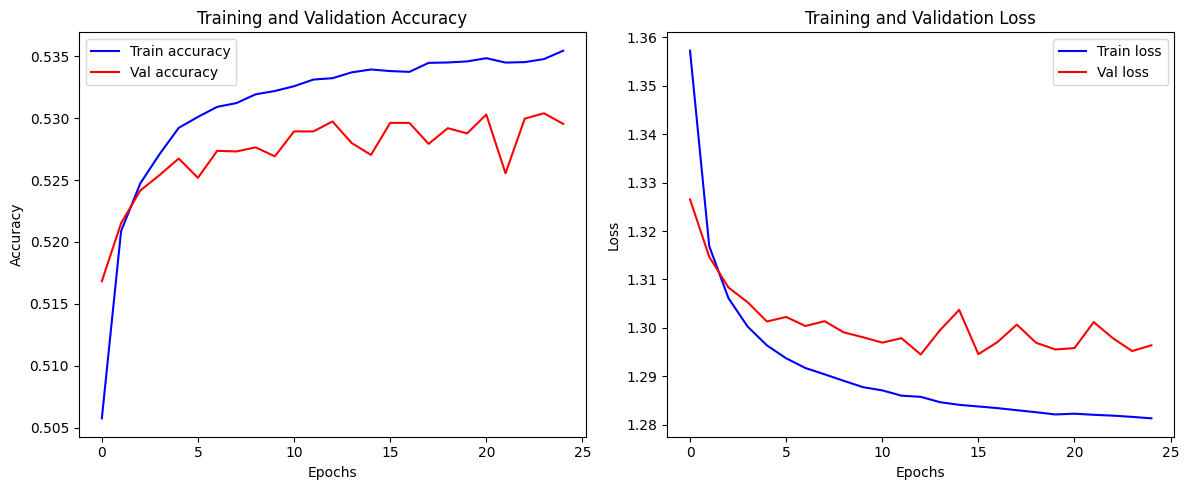

In [71]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], label='Train accuracy', color='blue')
plt.plot(training_log['epoch'], training_log['val_accuracy'], label='Val accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], label='Train loss', color='blue')
plt.plot(training_log['epoch'], training_log['val_loss'], label='Val loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [73]:
test_predictions_dl = model.predict(np.stack(test_df['w2v_embedding']), batch_size=128)

decoded_labels = label_decode(label_encoder, test_predictions_dl)

output_df = pd.DataFrame({
    'id': test_df['tweet_id'],
    'emotion': decoded_labels 
})

output_df.to_csv('submission.csv', index=False)

3219/3219 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [74]:
output_df

,id,emotion
2,0x28b412,anticipation
4,0x2de201,anticipation
9,0x218443,joy
30,0x2939d5,anticipation
33,0x26289a,anticipation
...,...,...
1867525,0x2913b4,anticipation
1867529,0x2a980e,anticipation
1867530,0x316b80,sadness
1867531,0x29d0cb,joy
